'''

Author: Prathamesh Deshpande<br>
Date: 12-11-24<br>
Last modified by: Prathamesh Deshpande<br>
Last modified time:<br>
Title: Linear Regression Model to predict apparent temperature  given humidity <br>

'''

Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score

Import the dataset

In [2]:
df = pd.read_csv("weatherHistory.csv")

In [3]:
df.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


Analyze the dataset

In [4]:
df.shape

(96453, 12)

In [5]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [33]:
x = df['Humidity']
y= df['Apparent Temperature (C)']

In [34]:
x

0        0.89
1        0.86
2        0.89
3        0.83
4        0.83
         ... 
96448    0.43
96449    0.48
96450    0.56
96451    0.60
96452    0.61
Name: Humidity, Length: 96407, dtype: float64

Identifying and Handling Missing Data

In [8]:
x.isnull().sum()

0

In [9]:
y.isnull().sum()

0

Visualize the Data

In [10]:
import warnings
warnings.filterwarnings('ignore')

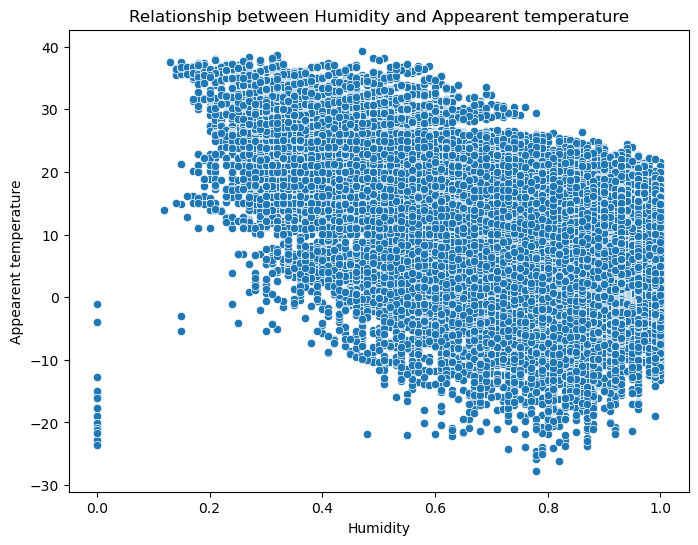

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x,y)
plt.title("Relationship between Humidity and Appearent temperature")
plt.xlabel("Humidity")
plt.ylabel("Appearent temperature")
plt.show()

Detect Outliers

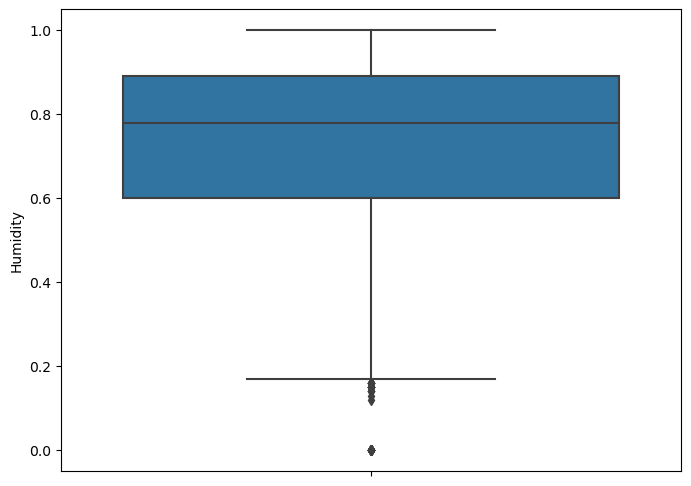

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=x)
plt.show()

Remove Outliers

In [13]:
Q1 = df['Humidity'].quantile(0.25)
Q3 = df['Humidity'].quantile(0.75)
IQR = Q3 - Q1
# Filter rows within IQR range
df = df[(df['Humidity'] >= Q1 - 1.5 * IQR) & (df['Humidity'] <= Q3 + 1.5 * IQR)]

In [15]:
df.shape

(96407, 12)

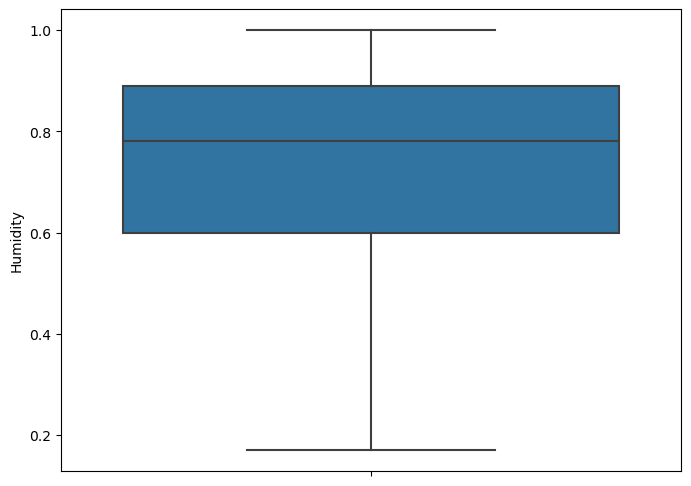

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Humidity'])
plt.show()

Train Test Split

In [17]:
x_train,x_test,y_train,y_test = train_test_split(df[['Humidity']],df[['Apparent Temperature (C)']],random_state=0,test_size=0.3)

In [18]:
x_train

,Humidity
13641,0.49
95091,0.93
7623,0.36
19616,0.93
17046,0.82
...,...
21261,0.57
45913,0.80
42635,0.93
43589,0.88


In [19]:
x_test

,Humidity
54679,0.93
85790,0.74
31246,0.59
66150,1.00
67317,0.77
...,...
37420,0.83
32087,0.89
27952,0.77
36092,0.75


In [20]:
y_train

,Apparent Temperature (C)
13641,17.666667
95091,4.305556
7623,22.083333
19616,3.194444
17046,16.022222
...,...
21261,22.916667
45913,5.300000
42635,11.094444
43589,11.233333


In [21]:
y_test

,Apparent Temperature (C)
54679,-7.516667
85790,12.216667
31246,12.222222
66150,18.800000
67317,14.261111
...,...
37420,-8.055556
32087,5.538889
27952,-6.766667
36092,25.250000


Model Selection

In [22]:
lr = LinearRegression()

In [23]:
lr.fit(x_train,y_train)

LinearRegression()

In [24]:
y_pred = lr.predict(x_test)

In [25]:
y_pred

array([[ 4.38485479],
       [10.69474013],
       [15.67622855],
       ...,
       [ 9.69844244],
       [10.3626409 ],
       [10.03054167]])

Model Evaluation

In [26]:
mse = mean_squared_error(y_test,y_pred)
r2_score = r2_score(y_test,y_pred)

In [27]:
print(mse)
print(r2_score)

71.32605878016119
0.369790718489325


Result Visualization

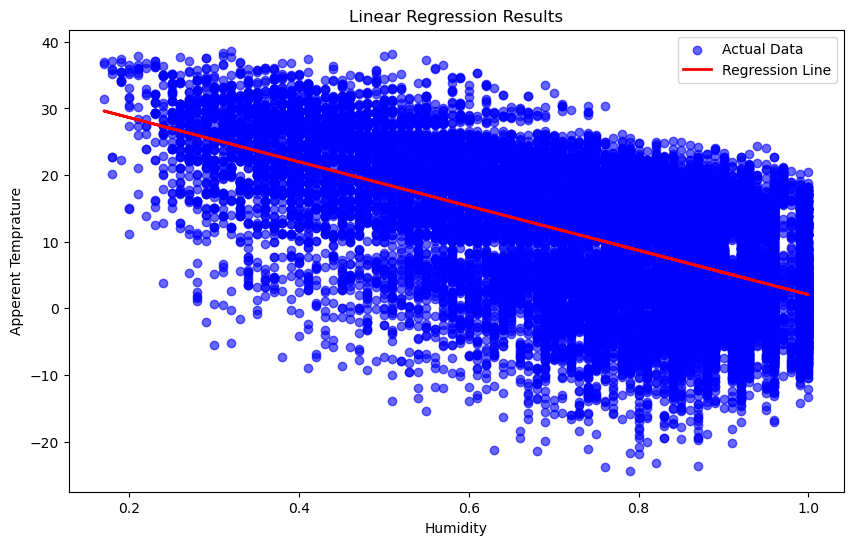

In [35]:
plt.figure(figsize=(10, 6))

# Scatter plot of actual data points
plt.scatter(x_test, y_test, color='blue', label='Actual Data', alpha=0.6)

# Plot regression line (predictions)
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Regression Line')

# Labels and Title
plt.xlabel("Humidity")
plt.ylabel("Apperent Temprature")
plt.title("Linear Regression Results")
plt.legend()
plt.show()